# 07_ex

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

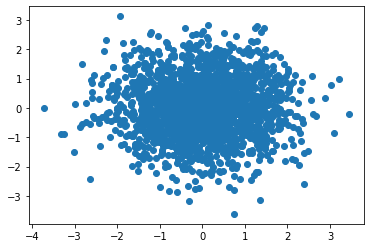

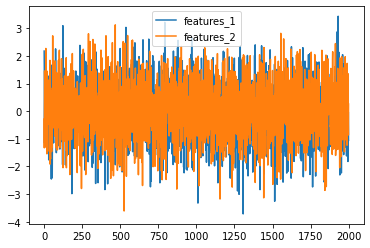

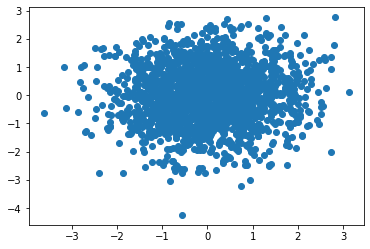

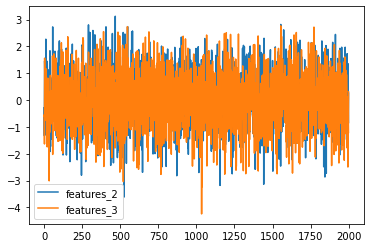

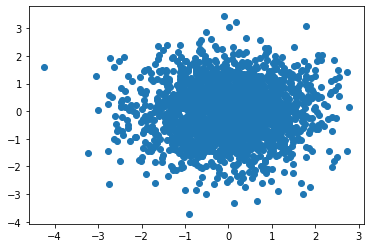

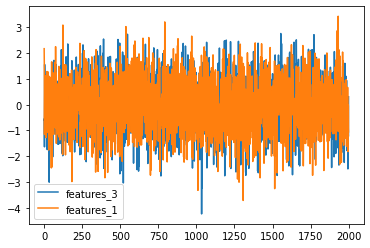

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("regression_generated.csv")
comb = (
    ("features_1", "features_2"),
    ("features_2", "features_3"),
    ("features_3", "features_1"),
)
for col_1, col_2 in comb:


    plt.scatter(df[col_1], df[col_2])
    plt.show()
    df[[col_1,col_2]].plot() #linear representation
    plt.show()


In [2]:
# Due to the plots, it seems they are not linearly correlated

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

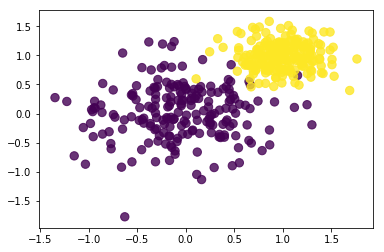

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

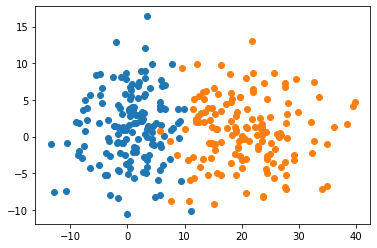

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def two_categories_data(mean1,mean2,std1,std2,size):
    x1 = np.random.normal(loc=mean1, scale=std1, size=size)
    y1 = np.random.normal(loc=mean1, scale=std1, size=size)
    
    
    x2 = np.random.normal(loc=mean2, scale=std2, size=size)
    y2 = np.random.normal(loc=mean1, scale=std1, size=size)
    
    return x1,y1,x2,y2




datasets_2d= two_categories_data(1,20,5,7,150)


plt.scatter(datasets_2d[0],datasets_2d[1])
plt.scatter(datasets_2d[2],datasets_2d[3])
plt.show()

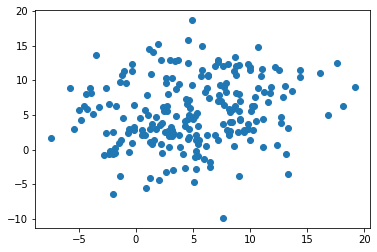

In [6]:
N = 50
x = np.random.normal(loc=5, scale=5, size=222)
y = np.random.normal(loc=5, scale=5, size=222)

plt.scatter(x, y)
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-12-02 11:40:09--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-02 11:40:09--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucea2454bef62c9582d1798b13a1.dl.dropboxusercontent.com/cd/0/inline/Bx2yGoLii-q3nAYy85ts89-hRgW9Ji08k8rD9GRwk9J-9bU21D2hoyUG62MyvRRF3xc6LrhaTT1CvVec__Zl53hqfaGUA-wV2Xo6ig8uAyw9gUaA9hR6nQYN8pEV4salgN4d1y-l-GgGmpkJZm-cLO_xoPgVZ8oOmMwWb5rshD04PA/file# [following]
--2022-12-02 11:40:10--  https://ucea2454bef62c9582d1798b13a1.dl.dropboxusercontent.com/cd/0/inline/Bx2yGoLii-q3nAYy85ts89-hRgW9Ji08k8rD9GRwk9J-9bU21D2hoyUG62MyvR

In [8]:
import pickle
import pandas as pd
import seaborn as sns

data = pd.read_pickle("data/residuals_261.pkl")

data_dic = data[()]
data_dic = pd.DataFrame(data_dic)


clean_dataframe = data_dic[(data_dic['residuals']**2)<=4]
clean_dataframe

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


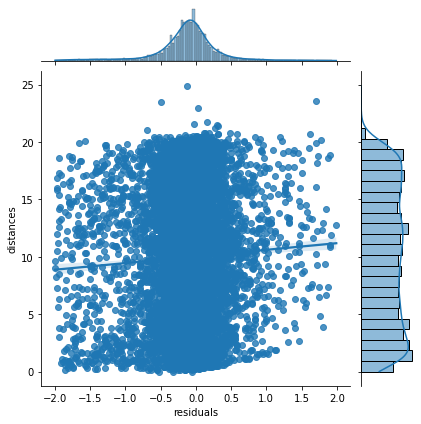

In [9]:
sns.jointplot(data=clean_dataframe, x="residuals", y="distances", kind="reg")

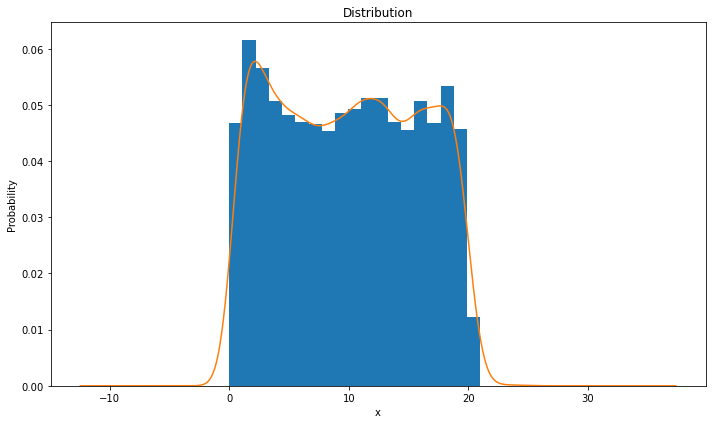

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
nrnd = clean_dataframe['distances'] 
fig, ax = plt.subplots(figsize=(10, 6))
h, bins, _ = plt.hist(nrnd, bins=19, range=(0, +21), density=True, cumulative=False)
nrnd.plot.kde(ax=ax, legend=False)

ax.set_title('Distribution')
ax.set_xlabel('x')
ax.set_ylabel('Probability')
fig.tight_layout()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


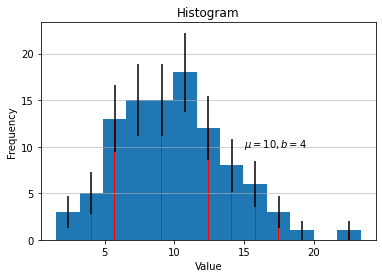

In [11]:
from scipy.stats import norm
means = 10
stdevs = 4
size = 100
x = np.random.normal(loc=means, scale=stdevs, size=size)
n,bins,patches = plt.hist(x=x,bins = 13)
y,binEdges = np.histogram(x,bins=13)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05

mu, std = norm.fit(x) 

# Plot the PDF.
xmin, xmax = plt.xlim()
lin = np.linspace(xmin, xmax, 100)
p = norm.pdf(lin, mu, std)

plt.bar(bincenters, y, width=width, color='r', yerr=menStd)

plt.grid(axis='y', alpha=0.75)


plt.text(15, 10, r'$\mu=10, b=4$')


plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
maxfreq = n.max()


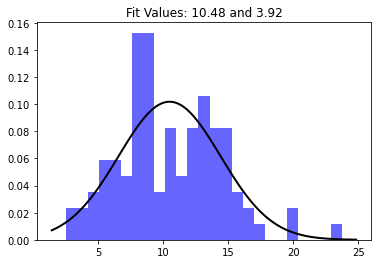

In [10]:

import numpy as np
import matplotlib.pyplot as plt

data = x

mu, std = norm.fit(data) 
  
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()